In [165]:
import HARK.ConsumptionSaving.ConsIndShockModel as Model        # The consumption-saving micro model
import HARK.ConsumptionSaving.ConsumerParameters as Params    # Parameters for the consumer type
from HARK.utilities import plotFuncsDer, plotFuncs              # Some tools
from time import time
mystr = lambda number : "{:.4f}".format(number)

do_simulation = True
import numpy as np

import matplotlib.pyplot as plt
#Code from Hark.ConsumptionSaving.ConsIndShockModel

In [62]:
LifecycleExample = Model.IndShockConsumerType(**Params.init_lifecycle)
LifecycleExample.cycles = 1 #1 for finite horizon and 0 for infinite horizon

In [159]:
#Unskilled Laborers: 3 percent growth from 25~40. flat for 40~65.

Params.init_lifecycle["CRRA"]= 2.00            # Default coefficient of relative risk aversion (rho)
Params.init_lifecycle["DiscFac"]= 0.96         # Default intertemporal discount factor (beta)
Params.init_lifecycle["PermGroFacAgg"]= 1.0    # Aggregate permanent income growth factor 
Params.init_lifecycle["aNrmInitMean"]= 0       # Mean of log initial assets 
Params.init_lifecycle["aNrmInitStd"]= 0.0      # Standard deviation of log initial assets
Params.init_lifecycle["pLvlInitMean"]= 0.0     # Mean of log initial permanent income 
Params.init_lifecycle["pLvlInitStd"]= 0.0      # Standard deviation of log initial permanent income

Params.init_lifecycle['PermGroFac'] = [1.03]*15 + [1]*35     #Oringinally, [1.01,1.01,1.01,1.01,1.01,1.02,1.02,1.02,1.02,1.02]
Params.init_lifecycle['PermShkStd'] = [0.1]*50               #Originally, [0.1,0.2,0.1,0.2,0.1,0.2,0.1,0,0,0]
Params.init_lifecycle['TranShkStd'] = [0.1]*50               #Originally, [0.3,0.2,0.1,0.3,0.2,0.1,0.3,0,0,0]
Params.init_lifecycle['LivPrb']     = [1]*50                 #Originally, [0.99,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
Params.init_lifecycle['T_cycle']    = 50                     #Life starts at age 25 and ends at 75. Originally 10
Params.init_lifecycle['T_retire']   = 40                    #Agents retire at age 65. Originally 7
Params.init_lifecycle['T_age']      = 51                    #Make sure that old people die at terminal age and don't turn into newborns! Originally 11

#Code From Hark.ConsumptionSaving.ConsumerParameters

In [160]:
start_time = time()
LifecycleExample.solve()
end_time = time()
print('Solving a lifecycle consumer took' +mystr(end_time-start_time) +' seconds.')
LifecycleExample.unpackcFunc()
LifecycleExample.timeFwd() #make sure that time is moving forward



Solving a lifecycle consumer took0.0750 seconds.


Consumption functions while working:


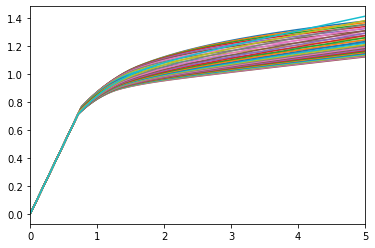

In [161]:
print('Consumption functions while working:')


mMin = min([LifecycleExample.solution[t].mNrmMin for t in range(LifecycleExample.T_cycle)])
#Finds the minimum of LifecycleExample.solution[t].mNrmMin for t = 0~49
#mNrmMin: The minimum allowable market resources for this period; the consumption function (etc) are undefined for m < mNrmMin.


plotFuncs(LifecycleExample.cFunc[:LifecycleExample.T_retire],mMin,5)
#This plots the consumption function for life periods 0~40. Plots it with respect to wealth from 0 to 5.
#The highest curve is for period 0.


In [58]:
wealth_0 = 10
LifecycleExample.cFunc[5](wealth_0)

array(3.81750816)

Consumption functions while retired:


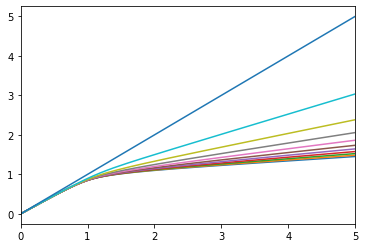

In [162]:
print('Consumption functions while retired:')
plotFuncs(LifecycleExample.cFunc[LifecycleExample.T_retire:],0,5)
#LifecycleExample.timeRev()

#Highest graph represents consumption in last period. MPC is 1 since the consumer consumes everything in the second to last period.

In [171]:
if do_simulation:
    LifecycleExample.T_sim = 120 #simulate 1000 agents
    LifecycleExample.track_vars = ['mNrmNow','cNrmNow','pLvlNow','t_age'] #track these variables
    LifecycleExample.initializeSim()
    LifecycleExample.simulate()

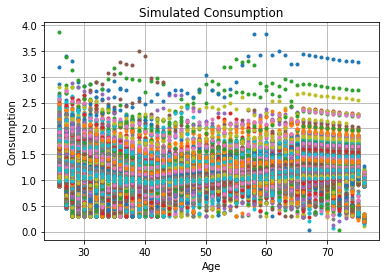

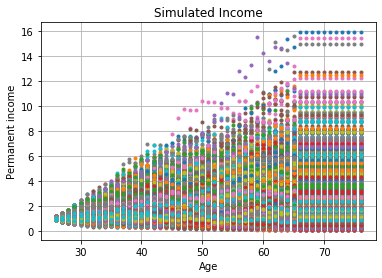

In [174]:
plt.figure()
plt.plot(LifecycleExample.t_age_hist+25, LifecycleExample.cNrmNow_hist,'.')
plt.xlabel('Age')
plt.ylabel('Consumption')
plt.title('Simulated Consumption')
plt.grid()

plt.figure()
plt.plot(LifecycleExample.t_age_hist+25, LifecycleExample.pLvlNow_hist,'.')
plt.xlabel('Age')
plt.ylabel('Permanent income')
plt.title('Simulated Income')
plt.grid()

